In [1]:
# Импорт библиотек для анализа данных
import pandas as pd
# import numpy as np

In [2]:
# Загрузка данных
full_df = pd.read_csv('data/titanic_full_cleared_v2.csv', header=0)

In [3]:
# Преобразование к int8
full_df = full_df.astype('int8')

In [4]:
# Настройки вывода
# Метод вывода для объекта pd.DataFrame
def _repr_html_styled_(self):
    styled_data = self.style.set_table_styles([
        {
            # Заголовки таблиц и индексы
            'selector': 'th', 
            'props': [
                ('font-family', 'Cascadia Mono PL SemiLight'),  # шрифт 
                ('font-weight', 'normal'),                      # толщина текста
                ('color', '#fac863'),                           # цвет текста
                ('opacity', '1'),                               # прозрачность текста
                ('background-color', '#143241'),                # цфет фона
                ('padding', '5px'),                             # отступы                
             ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#fac863'),
            ]
        },
        {
            # Содержимое ячеек
            'selector': 'td', 
            'props': [
                ('font-family', 'Cascadia Mono PL Light'), 
                ('padding', '5px')
            ]
        },
        {
            # Четные строки содержимого таблицы
            'selector': 'tbody tr:nth-child(even)', 
            'props': [
                ('background-color', '#ffffff00')  # нет цвета ("прозрачные")
            ]
        },
        {
            # Цвет фона для нечетных строк (начиная со строки заголовка)
            'selector': 'tr:nth-of-type(odd)', 
            'props': [
                ('background-color', '#ffffff0a')
            ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#ffffff5a'),
            ]
        },
        {
            # Hover эффект для ячейки
            'selector': 'td:hover',
            'props': [
                ('background-color', '#ffffff14'),
            ]
        },         
    ])

    return styled_data._repr_html_() # возврат HTML-представления стилизованных данных


# Переопределение метода вывода объекта pd.DataFrame
pd.DataFrame._repr_html_ = _repr_html_styled_

In [5]:
# Полный набор данных
full_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,CategoricalAge,WomanWithKid,PersonsInTicket,Cost,FareLog,CostLog,CategoricalFare,CategoricalCost
0,0,3,0,22,7,1,1,2,0,1,7,3,3,1,7
1,1,1,1,38,71,2,4,3,0,2,36,6,5,4,2
2,1,3,1,26,8,1,2,2,0,1,8,3,3,1,8
3,1,1,1,35,53,1,4,3,0,2,27,5,4,4,1
4,0,3,0,35,8,1,1,3,0,1,8,3,3,1,8


In [6]:
# Перемешиваем данные
# full_df = full_df.sample(frac=1).reset_index(drop=True)

In [7]:
# Удаление признаков которые негативно отразились на результатах предсказания
# df = full_df.drop(['SibSp', 'PersonsInTicket', 'FamilySize', 'Cost', 'IsAlone', 'Fare', 'Parch', 'Sex'], axis = 1)
df = full_df.drop(['Fare', 'PersonsInTicket', 'Age', 'Cost', 'CategoricalFare', 'WomanWithKid', 'CategoricalCost', 'CategoricalAge', 'CostLog', 'FareLog'], axis = 1)

In [8]:
# Окончательный набор данных
df.head()

,Survived,Pclass,Sex,Embarked,Title
0,0,3,0,1,1
1,1,1,1,2,4
2,1,3,1,1,2
3,1,1,1,1,4
4,0,3,0,1,1


In [9]:
# Делим данные на тренировочный и тестовый наборы
train = df.iloc[:891].reset_index(drop=True)    # тренировочная выборка
test = df.iloc[891:].reset_index(drop=True)     # тестовая выборка

In [10]:
# Определяем выборки
X_train = train.drop('Survived', axis=1)    # удаляем столбец Survived из тренировочных данных
y_train = train['Survived']                 # используем столбец Survived как вектор целевых значений
X_test = test.drop('Survived', axis=1)      # удаляем столбец Survived из тестовых данных
y_test = test['Survived']                   # используем столбец Survived как вектор целевых значений

In [11]:
'''# Определяем выборки
X_train = pd.read_csv('data/titanic_X_train_nikolay_guriev.csv', header=0)
y_train = pd.read_csv('data/titanic_y_train.csv', header=0)
X_test = pd.read_csv('data/titanic_X_test_nikolay_guriev.csv', header=0)
y_test = pd.read_csv('data/titanic_y_test.csv', header=0)'''

"# Определяем выборки\nX_train = pd.read_csv('data/titanic_X_train_nikolay_guriev.csv', header=0)\ny_train = pd.read_csv('data/titanic_y_train.csv', header=0)\nX_test = pd.read_csv('data/titanic_X_test_nikolay_guriev.csv', header=0)\ny_test = pd.read_csv('data/titanic_y_test.csv', header=0)"

In [12]:
# Тренировочная выборка X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int8 
 1   Sex       891 non-null    int8 
 2   Embarked  891 non-null    int8 
 3   Title     891 non-null    int8 
dtypes: int8(4)
memory usage: 3.6 KB


In [13]:
# Тренировочная выборка y_train
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int8 
dtypes: int8(1)
memory usage: 1023.0 bytes


In [14]:
# Тестовая выборка X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int8 
 1   Sex       418 non-null    int8 
 2   Embarked  418 non-null    int8 
 3   Title     418 non-null    int8 
dtypes: int8(4)
memory usage: 1.8 KB


In [15]:
# Тестовая выборка y_test
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null    int8 
dtypes: int8(1)
memory usage: 550.0 bytes


In [16]:
# Импорт библиотек для машинного обучения
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [17]:
# Сравнение классификаторов
# Список классификаторов
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()
]   

# Создание DataFrame для хранения результатов работы моделей на тренировочных данных
log_cols = ['Classifier', 'Accuracy', 'Precision']
log_df = pd.DataFrame(columns=log_cols)

# Цикл перебора классификаторов и оценка их точности с использованием cross_val_score
for clf in classifiers:
    name = clf.__class__.__name__
    accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision').mean()
    log_entry_df = pd.DataFrame([[name, accuracy, precision]], columns=log_cols)
    log_df = pd.concat([log_df, log_entry_df], ignore_index=True)

In [18]:
# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Установка стиля seaborn
sns.set_theme(style='darkgrid', rc={'figure.facecolor': '#eaeaf2'})

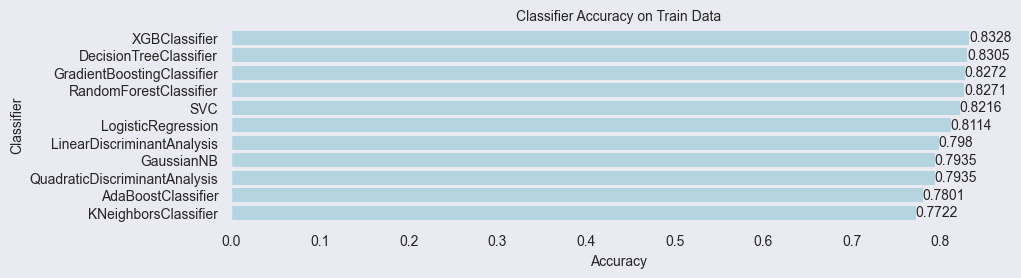

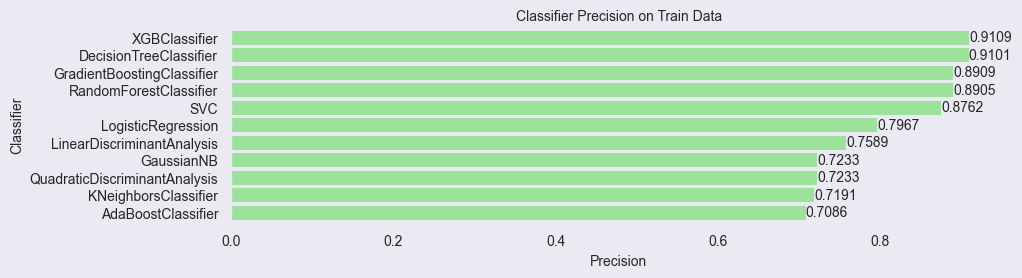

In [20]:
# Диаграммы сравнения классификаторов на тренировочных данных
# Функция построения диаграммы
def plot_classifier_performance(data, x_label, title, color):
    plt.figure(figsize=(10, 2.5))
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel('Classifier', fontsize=10)
    plt.title(title, fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)  # размер меток на шкале

    ax = sns.barplot(x=x_label, y='Classifier', data=data, color=color, linewidth=0)
    ax.xaxis.grid(False)  # вертикальные линии на оси X
    for spine in ax.spines.values():
        spine.set_color('#eaeaf2')  # цвет рамки
        spine.set_linewidth(1.0)    # толщина рамки

    for index, value in enumerate(data[x_label]):
        plt.text(value, index + 0.25, str(round(value, 4)), fontsize=10)


# Сортировка данных по убыванию столбца Accuracy
log_df = log_df.sort_values(by='Accuracy', ascending=False)
# Построение диаграммы для Accuracy
plot_classifier_performance(log_df, 'Accuracy', 'Classifier Accuracy on Train Data', 'lightblue')

# Сортировка данных по убыванию столбца Precision
log_df = log_df.sort_values(by='Precision', ascending=False)
# Построение диаграммы для Precision
plot_classifier_performance(log_df, 'Precision', 'Classifier Precision on Train Data', 'lightgreen')

In [21]:
# Импорт библиотек для тонкой настройки моделей
from sklearn.model_selection import GridSearchCV  # класс для поиска оптимальных параметров

In [22]:
# Классификатор SVC с параметрами по-умолчанию
# Создание модели SVC с линейным ядром
sv_clf = SVC(probability=True)

# Обучение модели на тренировочных данных
sv_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = sv_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Вывод результата
print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

Доля правильных ответов (Accuracy): 0.7895
Точность (Precision): 0.8087


In [23]:
# Классификатор DecisionTreeClassifier с параметрами по-умолчанию
# Создание модели DecisionTreeClassifier с линейным ядром
dt_clf = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
dt_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Вывод результата
print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

Доля правильных ответов (Accuracy): 0.7895
Точность (Precision): 0.7983


In [24]:
# Классификатор RandomForestClassifier с параметрами по-умолчанию
# Создание модели RandomForestClassifier с линейным ядром
rf_clf = RandomForestClassifier()

# Обучение модели на тренировочных данных
rf_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Вывод результата
print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

Доля правильных ответов (Accuracy): 0.7895
Точность (Precision): 0.7983


In [25]:
# Классификатор GradientBoostingClassifier с параметрами по-умолчанию
# Создание модели GradientBoostingClassifier с линейным ядром
gb_clf = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Вывод результата
print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

Доля правильных ответов (Accuracy): 0.7895
Точность (Precision): 0.7983


In [26]:
# Классификатор XGBClassifier с параметрами по-умолчанию
# Создание модели XGBClassifier
xgb_clf = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Вывод результата
print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

Доля правильных ответов (Accuracy): 0.7895
Точность (Precision): 0.7983


In [27]:
'''# Классификатор SVC с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'probability': [True, False],    
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],     # типы ядер
    'C': [0.1, 1, 10, 100],                             # параметр регуляризации
    'gamma': [1, 0.1, 0.01, 0.001]                      # параметр ядра (для RBF)
}

# Создание объекта GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Обучение (тренировка) модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print('Наилучшие найденные параметры:', best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных (эти данные модель не видела при обучении)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))'''

"# Классификатор SVC с подбором параметров\n# Сетка параметров для поиска\nparam_grid = {\n    'probability': [True, False],    \n    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],     # типы ядер\n    'C': [0.1, 1, 10, 100],                             # параметр регуляризации\n    'gamma': [1, 0.1, 0.01, 0.001]                      # параметр ядра (для RBF)\n}\n\n# Создание объекта GridSearchCV для поиска оптимальных параметров\ngrid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)\n\n# Обучение (тренировка) модели\ngrid_search.fit(X_train, y_train)\n\n# Получение наилучших параметров\nbest_params = grid_search.best_params_\nprint('Наилучшие найденные параметры:', best_params)\n\n# Получение наилучшей модели\nbest_model = grid_search.best_estimator_\n\n# Предсказание результатов на тестовых данных (эти данные модель не видела при обучении)\ny_pred = best_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test

In [28]:
# Классификатор DecisionTreeClassifier с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Создание экземпляра GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print('Наилучшие найденные параметры:', best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

# Оценка важности признаков
importances = best_model.feature_importances_

# Создание DataFrame для удобства анализа результатов
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print('Важность признаков:')
print(feature_importance_df)

Наилучшие найденные параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Доля правильных ответов (Accuracy): 0.7871
Точность (Precision): 0.7917
Важность признаков:
    Feature  Importance
3     Title    0.700035
0    Pclass    0.260091
2  Embarked    0.039874
1       Sex    0.000000


In [29]:
# Классификатор XGBClassifier с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Создание экземпляра GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=10, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print('Наилучшие найденные параметры:', best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Доля правильных ответов (Accuracy):', round(accuracy, 4))
print('Точность (Precision):', round(precision, 4))

# Оценка важности признаков
importances = best_model.feature_importances_

# Создание DataFrame для удобства анализа результатов
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print('Важность признаков:')
print(feature_importance_df)

Наилучшие найденные параметры: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Доля правильных ответов (Accuracy): 0.7895
Точность (Precision): 0.7983
Важность признаков:
    Feature  Importance
3     Title    0.676393
0    Pclass    0.263306
2  Embarked    0.046190
1       Sex    0.014111


In [30]:
'''# Классификатор GradientBoostingClassifier с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Создание экземпляра GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print("Наилучшие найденные параметры:", best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Точность (Precision):", round(precision, 3))
print("Доля правильных ответов (Accuracy):", round(accuracy, 3))

# Оценка важности признаков
importances = best_model.feature_importances_

# Создание DataFrame для удобства анализа результатов
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print("Важность признаков:")
print(feature_importance_df)'''

'# Классификатор GradientBoostingClassifier с подбором параметров\n# Сетка параметров для поиска\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'learning_rate\': [0.01, 0.1, 0.5],\n    \'max_depth\': [3, 5, 7]\n}\n\n# Создание экземпляра GridSearchCV для поиска оптимальных параметров\ngrid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, scoring=\'accuracy\')\n\n# Обучение модели\ngrid_search.fit(X_train, y_train)\n\n# Получение наилучших параметров\nbest_params = grid_search.best_params_\nprint("Наилучшие найденные параметры:", best_params)\n\n# Получение наилучшей модели\nbest_model = grid_search.best_estimator_\n\n# Предсказание результатов на тестовых данных\ny_pred = best_model.predict(X_test)\nprecision = precision_score(y_test, y_pred)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Точность (Precision):", round(precision, 3))\nprint("Доля правильных ответов (Accuracy):", round(accuracy, 3))\n\n# Оценка важности признаков\nimportances = bes

In [31]:
def make_submission(y_pred, file_name):
    submission = pd.DataFrame({'PassengerId': list(range(892, 1310)), 'Survived': [int(i) for i in y_pred]})
    submission.to_csv(file_name, index=False)

In [32]:
# make_submission(y_pred, 'data/answers/answers.csv')